In [1]:
import numpy as np
import darkopt as dark # can import either entire package
from darkopt import materials, optimize # or import submodules seperately 
import darkopt.plotting as plot
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from scipy.signal import savgol_filter
import time

from matplotlib import rcParams
import matplotlib.cm as cm



nice_fonts = {
        # Use LaTeX to write all text
        #"text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 14,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}

rcParams.update(nice_fonts)
#rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = '--'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['ytick.right'] = True

### Optimzie for Rn


In [3]:
desired_coverage = 0.01

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 17e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]



rp = 2e-3
ahole = 4.9e-11

w_overlap0 = 15e-6

w_overlap0 = 'circle'
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds ]
fix_w_overlap=True

safety = 200e-6
veff_WAloverlap=.13 # theoretical

res = []
length = []
overlap = []
fin = []
nf = []
surf = []
ntes = []


res_n = np.linspace(200e-3, 750e-3, 100)

for ii in tqdm(range(len(res_n))):
    time.sleep(0.01)
    det1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                        w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                         bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds, 
                                                          verbose=False)
    res.append(det1.calc_res())
    length.append(det1.QET.TES.l)
    overlap.append(det1.QET.TES.l_overlap)
    fin.append(det1.QET.l_fin)
    nf.append(det1.QET.TES.n_fin)
    surf.append(det1._fSA_qpabsorb)
    ntes.append(det1.QET.TES.nTES)
res=np.array(res)
length=np.array(length)
overlap=np.array(overlap)
fin=np.array(fin)
nf=np.array(nf)
surf=np.array(surf)
ntes=np.array(ntes) 
                   
    

    

In [5]:
np.save('res_1.np', res)
np.save('length_1.np', length)
np.save('overlap_1.np', overlap)
np.save('fin_1.np', fin)
np.save('surf_1.np', surf)

np.save('ntes_1.np', ntes)
np.save('nfin_1.np', nf)

In [12]:


res_n = np.linspace(200e-3, 750e-3, 100)

In [ ]:
plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, length*1e6)
#plt.plot(res_n*1e3, fin*1e6)
plt.plot(res_n*1e3, savgol_filter(length, 15, 2)*1e6, linestyle='-', color='k',
         label='TES')
plt.ylabel('Length [μs]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
plt.plot(res_n*1e3, savgol_filter(fin, 15, 2)*1e6, linestyle='--', color='k',
         label='Al Fin')
plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.legend()
plt.tight_layout()
plt.savefig('./figs/length_vs_rn.pdf')


plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, ntes)
plt.plot(res_n*1e3, savgol_filter(ntes, 15, 2), color='k')
plt.ylabel('Number of QETs')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.tight_layout()
plt.savefig('./figs/ntes_vs_rn.pdf')

plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, res*1e3)
plt.plot(res_n*1e3, savgol_filter(res, 15, 2)*1e3, color='k')
plt.ylabel(r'$\sigma_E$ [meV]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.tight_layout()
plt.savefig('./figs/eres_vs_rn.pdf')

### Optimize 1% coverage device

optimize both for the effective overlap efficiency factor of 0.13 and 0.45. Ideally, the design parameters should not vary significantly between the two

In [26]:
desired_coverage = 0.01

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]



rp = 2e-3
ahole = 4.9e-11

w_overlap0 = 15e-6

w_overlap0 = 'circle'
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fix_w_overlap=True

safety = 200e-6

det_opt_13_list = []
det_opt_45_list = []

res_n = np.linspace(385e-3, 415e-3, 20)
for ii in tqdm(range(len(res_n))):
    time.sleep(0.01)
    
    veff_WAloverlap=.13 # theoretical
    det_opt_13, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                        w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                         bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds
                                                         , verbose=False)

    veff_WAloverlap=.45 # measured
    
    det_opt_45, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                          w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                        bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds
                                                         , verbose=False)
    det_opt_13_list.append(det_opt_13)
    det_opt_45_list.append(det_opt_45)

resolution: 158.1 [meV]
TES Length = 44.9 [μm]
Overlap Legth = 19.8 [μm]
Overlap Width = 39.7 [μm]
Fin Length = 55.6 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.001 [%]
percent active Al = 0.521 [%]
percent passive Al = 0.480 [%]
TES response time τ-  = 54.42 [μs]
Phonon collection time constant = 36.56 [μs]
Absolute phonon collection energy efficiency = 18.98 [%]
Number of TESs = 113
Rn = 385.0 [mOhms]
Close Packed: False
Phase margin = 592.7 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


resolution: 209.9 [meV]
TES Length = 48.0 [μm]
Overlap Legth = 9.7 [μm]
Overlap Width = 19.4 [μm]
Fin Length = 52.7 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
percent active Al = 0.508 [%]
percent passive Al = 0.492 [%]
TES response time τ-  = 54.42 [μs]
Phonon collection time constant = 36.60 [μs]
Absolute phonon collection energy efficiency = 14.13 [%]
Number of TESs = 120
Rn = 385.0 [mOhms]
Close Packe

resolution: 209.1 [meV]
TES Length = 48.4 [μm]
Overlap Legth = 10.0 [μm]
Overlap Width = 20.0 [μm]
Fin Length = 53.3 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
percent active Al = 0.512 [%]
percent passive Al = 0.488 [%]
TES response time τ-  = 54.32 [μs]
Phonon collection time constant = 36.60 [μs]
Absolute phonon collection energy efficiency = 14.40 [%]
Number of TESs = 118
Rn = 396.1 [mOhms]
Close Packed: False
Phase margin = 572.9 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


resolution: 156.6 [meV]
TES Length = 45.6 [μm]
Overlap Legth = 19.8 [μm]
Overlap Width = 39.6 [μm]
Fin Length = 56.3 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.002 [%]
percent active Al = 0.526 [%]
percent passive Al = 0.476 [%]
TES response time τ-  = 54.30 [μs]
Phonon collection time constant = 36.53 [μs]
Absolute phonon collection energy efficiency = 19.06 [%]
Number of TESs = 111
Rn = 397.6 [mOhms]
Close Pack

resolution: 136.5 [meV]
TES Length = 43.4 [μm]
Overlap Legth = 13.0 [μm]
Overlap Width = 26.1 [μm]
Fin Length = 59.9 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
percent active Al = 0.540 [%]
percent passive Al = 0.460 [%]
TES response time τ-  = 54.20 [μs]
Phonon collection time constant = 36.60 [μs]
Absolute phonon collection energy efficiency = 16.30 [%]
Number of TESs = 102
Rn = 408.7 [mOhms]
Close Packed: False
Phase margin = 759.3 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


resolution: 208.6 [meV]
TES Length = 49.0 [μm]
Overlap Legth = 9.4 [μm]
Overlap Width = 18.7 [μm]
Fin Length = 53.9 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
percent active Al = 0.516 [%]
percent passive Al = 0.485 [%]
TES response time τ-  = 54.20 [μs]
Phonon collection time constant = 36.60 [μs]
Absolute phonon collection energy efficiency = 13.81 [%]
Number of TESs = 116
Rn = 408.7 [mOhms]
Close Packe

We can see that the TES length and Fin length are largely unchanged between the two designs, only the overlap region changes, which makes sense

We now want to create a detector with a combination of the parameters found above

In [29]:
absorber = det_opt_13._absorber
qet = det_opt_13.QET
tes = det_opt_13.QET.TES
det = det_opt_13
rn = 400e-3

n_fin = tes.n_fin
l = (np.mean([d.QET.TES.l for d in det_opt_13_list]) \
     + np.mean([d.QET.TES.l for d in det_opt_45_list]))/2
w = (np.mean([d.QET.TES.w for d in det_opt_13_list]) \
     + np.mean([d.QET.TES.w for d in det_opt_45_list]))/2
l_overlap = np.mean([d.QET.TES.l_overlap for d in det_opt_13_list])*1/3 \
     + np.mean([d.QET.TES.l_overlap for d in det_opt_45_list])*2/3
w_overlap = 'circle'
l_fin = (np.mean([d.QET.l_fin for d in det_opt_13_list]) \
     + np.mean([d.QET.l_fin for d in det_opt_45_list]))/2

abso1 = dark.Absorber(name=absorber._name, shape=absorber._shape,
                height=absorber._h, width=absorber._width,
                w_safety=absorber._w_safety)

tes1 = dark.TES(length=l, width=tes.w, l_overlap=l_overlap, n_fin=n_fin, sigma=tes.sigma,
           rn=rn, rsh=tes.rsh, rp=tes.rp, L_tot=tes.L, tload=tes.tload, 
           w_overlap=w_overlap, w_fin_con=tes.w_fin_con, h=tes.h, 
           veff_WAloverlap=tes.veff_WAloverlap, veff_WFinCon=tes.veff_WFinCon, 
           con_type=tes.con_type, material=tes.material, operating_point=tes.fOp,
           alpha=tes.alpha, beta=tes.beta, wempty_fin=tes.wempty_fin, 
           wempty_tes=tes.wempty_tes, n=tes.n, Qp=tes.Qp, t_mc=tes.t_mc,
           w_overlap_stem=tes.w_overlap_stem,  l_c=tes.l_c, 
           l_overlap_pre_ellipse=tes.l_overlap_pre_ellipse)

qet1 = dark.QET(l_fin=l_fin, h_fin=qet.h_fin, TES=tes1, ahole=qet.ahole, ePQP=qet.ePQP,
           eff_absb=qet.eff_absb, nhole_per_fin=qet.nhole_per_fin, 
           type_qp_eff=qet.type_qp_eff)

det1 = dark.Detector(abso1, qet1, n_channel=det._n_channel, w_rail_main=det.w_rail_main, 
                w_railQET=det.w_railQET, bonding_pad_area=det.bonding_pad_area,
                freqs=det.freqs )

print(f"resolution: {det1.calc_res()*1e3:.1f} [meV]")
print(f"TES Length = {det1.QET.TES.l*1e6:.1f} [μm]")
print(f"Overlap Legth = {det1.QET.TES.l_overlap*1e6:.1f} [μm]")
print(f"Overlap Width = {det1.QET.TES.w_overlap*1e6:.1f} [μm]")
print(f"Fin Length = {det1.QET.l_fin*1e6:.1f} [μm]")
print(f"Fin Height = {det1.QET.h_fin*1e6:.1f} [μm]")
print(f"N Fins = {det1.QET.TES.n_fin}")
print(f'Total Al surface coverage = {det1._fSA_qpabsorb*100:.3f} [%]')
print(f'percent active Al = {det1.fSA_active*100:.3f} [%]')
print(f'percent passive Al = {det1.fSA_passive*100:.3f} [%]')
print(f'TES thermal fall time τ0  = {det1.QET.TES.tau0*1e6:.2f} [μs]')
print(f'TES response time τ-  = {det1.QET.TES.taup_m*1e6:.2f} [μs]')
print(f'Phonon collection time constant = {det1._t_pabsb*1e6:.2f} [μs]')
print(f'Absolute phonon collection energy efficiency = {det1._eEabsb*100:.2f} [%]')
print(f'Number of TESs = {det1.QET.TES.nTES}')
print(f'Rn = {det1.QET.TES.rn*1e3:.1f} [mOhms]')
print(f'Close Packed: {det1._close_packed}')
    

resolution: 142.8 [meV]
TES Length = 46.0 [μm]
Overlap Legth = 11.4 [μm]
Overlap Width = 22.9 [μm]
Fin Length = 56.3 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.005 [%]
percent active Al = 0.529 [%]
percent passive Al = 0.476 [%]
TES thermal fall time τ0  = 3731.24 [μs]
TES response time τ-  = 54.28 [μs]
Phonon collection time constant = 36.43 [μs]
Absolute phonon collection energy efficiency = 15.43 [%]
Number of TESs = 111
Rn = 400.0 [mOhms]
Close Packed: False


explore allowing the QETs to be closely spaced

In [4]:
desired_coverage = 0.01

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]


res_n = 250e-3
rp = 2e-3
ahole = 4.9e-11

w_overlap0 = 15e-6

w_overlap0 = 'circle'
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fix_w_overlap=True

safety = 200e-6

veff_WAloverlap=.45 # theoretical
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_45_equal, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fix_w_overlap=fix_w_overlap,
                                                    w_overlap = w_overlap0,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=safety,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                     bounds = bounds, 
                                                    w_overlap_bounds=w_overlap_bnds)
print(f'Effective W/Al volume = {veff_WAloverlap}')

equal_spaced = False
det_opt_45_dense, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fix_w_overlap=fix_w_overlap,
                                                    w_overlap = w_overlap0,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=safety,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                    bounds = bounds, 
                                                    w_overlap_bounds=w_overlap_bnds,
                                                    equal_spaced=equal_spaced )




Effective W/Al volume = 0.45
resolution: 234.9 [meV]
TES Length = 42.1 [μm]
Overlap Legth = 8.4 [μm]
Overlap Width = 16.8 [μm]
Fin Length = 43.4 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
percent active Al = 0.442 [%]
percent passive Al = 0.558 [%]
Absolute phonon collection energy efficiency = 12.76 [%]
Number of TESs = 162
Rn = 250.0 [mOhms]
Close Packed: False
Phase margin = 708.9 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


Effective W/Al volume = 0.45
resolution: 191.5 [meV]
TES Length = 44.1 [μm]
Overlap Legth = 9.1 [μm]
Overlap Width = 18.2 [μm]
Fin Length = 48.9 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
percent active Al = 0.603 [%]
percent passive Al = 0.397 [%]
Absolute phonon collection energy efficiency = 16.93 [%]
Number of TESs = 170
Rn = 250.0 [mOhms]
QETs are NOT equally spaced on surface
Phase margin = 654.3 [%] (phase_sep_length  - tes_length )/tes_length )
---

### Plots

(<Figure size 486x320.76 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9024b35e80>)

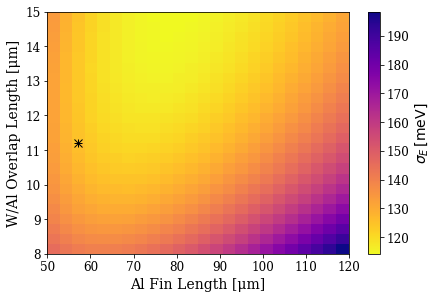

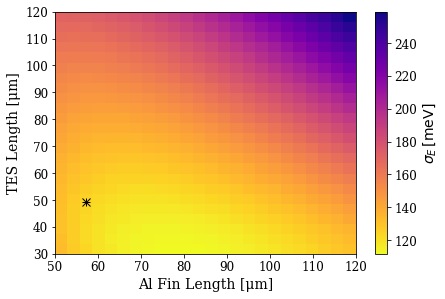

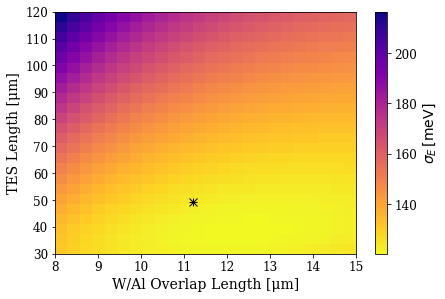

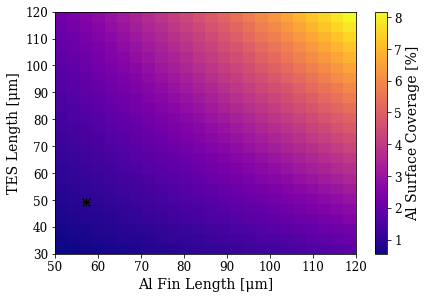

In [22]:
n = 25

l = np.linspace(30e-6, 120e-6, n)
l_f = np.linspace(50e-6, 120e-6, n)
l_overlap = np.linspace(8e-6, 15e-6, n)

plot.plot_loverlap_vs_lfin(l_overlap, l_f, det1, val='energy')
plot.plot_ltes_vs_lfin(l, l_f, det1, val='energy')
plot.plot_ltes_vs_loverlap(l, l_overlap, det1, val='energy')


plot.plot_ltes_vs_lfin(l, l_f, det1, val='al')


### 2 channel device

In [3]:
desired_coverage = 0.01

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]

res_n = 350e-3
rp = 2e-3
ahole = 4.9e-11


bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fixrn=True

veff_WAloverlap=.13 # theoretical
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                    n_channel=2,
                                                     bounds = bounds)

veff_WAloverlap=.45 # measured
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                     n_channel=2,
                                                    bounds = bounds)


Effective W/Al volume = 0.13
resolution: 105.5 [meV]
TES Length = 38.3 [μm]
Overlap Legth = 23.7 [μm]
Fin Length = 50.5 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
Absolute phonon collection energy efficiency = 28.84 [%]
Number of TESs = 105
Rn = 350.0 [mOhms]
Close Packed: False
Phase margin = 624.5 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


Effective W/Al volume = 0.45
resolution: 124.3 [meV]
TES Length = 39.0 [μm]
Overlap Legth = 8.0 [μm]
Fin Length = 49.7 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.002 [%]
Absolute phonon collection energy efficiency = 21.16 [%]
Number of TESs = 108
Rn = 350.0 [mOhms]
Close Packed: False
Phase margin = 716.1 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


